## Импорт библиотек

In [1]:
#pip install Fast_ml

In [2]:
# Т.к. столбец is_ultra - классификатор, нам потребуются модули - классификаторы
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

## Загрузка датасета

In [3]:
try:
    df = pd.read_csv('./datasets/users_behavior.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')
print ('Размер датасета:', len(df))
df.head()

Размер датасета: 3214


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
#На всякий случай проверим сколько у нас значений с Ультра и без
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

Количество строк достаточное для разработки модели.

In [5]:
#Есть смысл в конце сравнить результат с константой.
print ('Точность модели, которая = константе (0) = {:2.2%}'.format(len(df[df['is_ultra']==0])/len(df)))

Точность модели, которая = константе (0) = 69.35%


Т.к. в условии задания прописано, что предобработка не требуется, пропустим блок этот блок.

In [6]:
#Так как нам требуется тестовая и валидационная выборка, воспользуемся методом бебелиотеки Fast_ml train_valid_test_split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'is_ultra', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

## Модель "Решающее дерево"

In [7]:
best_depth = None
best_result_1 = 0
for depth in range(1,6):
    model1 = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model1.fit(X_train,y_train)
    predictions_valid = model1.predict(X_valid)
    result = accuracy_score(y_valid, predictions_valid) 
    if result > best_result_1:
        best_result_1 = result
        best_depth = depth
print('max_depth =',best_depth,':',best_result_1)

max_depth = 4 : 0.8193146417445483


Неплохо, наибольшая точность при использовании данного метода составила 76,94% при использовании глубины деревьев - 5

## Модель "Случайный лес"

In [8]:
best_model = None
best_result_2 = 0
for depth in range (1,10):
    for est in range(1, 11):
        model2 = RandomForestClassifier(max_depth=depth, random_state=12345, n_estimators=est) # создаем модель
        model2.fit(X_train, y_train) # обучаем модель
        result = model2.score(X_valid,y_valid) # подсчет качества
        if result > best_result_2:
            bes_est = est
            best_result_2 = result
            best_depth = depth
print('estimator =',bes_est,':',best_result_2, 'depth =',best_depth)

estimator = 9 : 0.8442367601246106 depth = 8


Модель "Случайный лес" отработала лучше, точность составляет 79,75% 

## Модель логическая регрессия

In [9]:
model3 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model3.fit(X_train,y_train)
model3.predict(X_valid) 
best_result_3 = model3.score(X_valid, y_valid) 
print ('Точность модели при логической регрессии:', best_result_3)

Точность модели при логической регрессии: 0.7227414330218068


Логическая регрессия менее точно предсказывает ключевую метрику, поэтому остановимся на лучшей модели - Случайный лес

    
<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Не за что =)
</div>

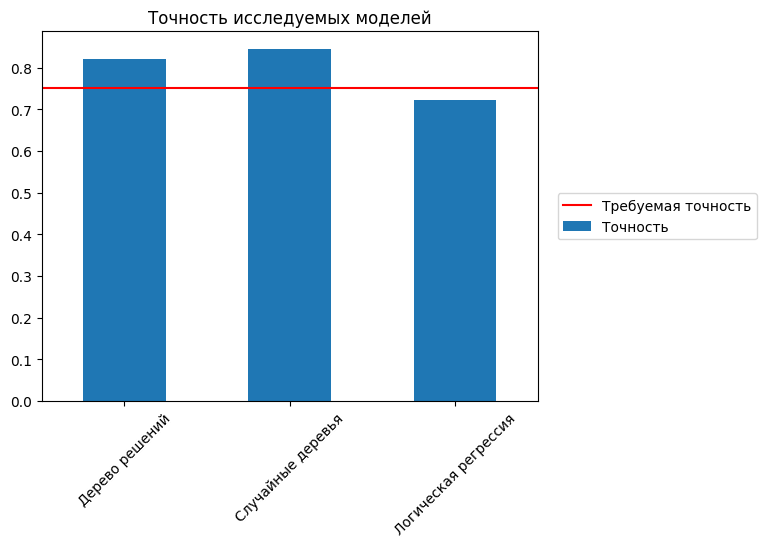

In [10]:
#Визуализируем итоговые значения
#df_results = {'Дерево решений': [best_result_1], 'Случайные деревья': [best_result_2], 'Логическая регрессия': [best_result_3]}
res = pd.DataFrame([best_result_1,best_result_2,best_result_3], 
                   index = ['Дерево решений','Случайные деревья','Логическая регрессия'],columns = ['Точность'])\
    .plot(kind = 'bar', rot = 45)
plt.axhline(y=0.75, color='r', linestyle='-', label = 'Требуемая точность')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.title('Точность исследуемых моделей') 
plt.show()

In [11]:
#Протестируем модель случайного леса на тестовой выборке, чтобы убедиться, 
#что она не переобучается и работает с реальными данными
result = model2.score(X_test, y_test)
print ('Точность на тестовой выборке по методу случайный лес = {:2.2%}'
       .format(result))

Точность на тестовой выборке по методу случайный лес = 83.54%


* Благодаря детальному подбору гиперпараметров нам удалось достичь точности на валидационной выборке - 79,75% и на тестовой - 80,75%
* Данный уровень точности удовлетворяет требованиям ТЗ.

## Выводы

* Метод случайных деревьев на валидационной выборке показал себя лучше всего, Также он отлично справился с тестовой выборкой, что говорит нам о том, что данная модель не переобучена.
* Логическая регрессия показала себя хуже остальных.